<h1><center>DS420 - Lec18: Natural Language Processing (Part 1)</center></h1>

## Problem Statement

Our goal is to look at transcripts of various comedians and note their similarities and differences. Specifically, we'd like to know if a particular comedian's comedy style is different than other comedians, say, Dave Chappelle.

## Section 1: Data Preparation

The very first step of any data science project is data preparation. It is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

1. **Getting the data** - in this case, we'll be using an already scraped data from a website
2. **Cleaning the data** - we will walk through popular text pre-processing techniques
3. **Organizing the data** - we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this step will be clean, organized data in two standard text formats:

1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

### 1. Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (\n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

#### Import all necessary libraries - Pandas, Numpy, Matplotlib, and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the scraped comedian show transcript dataset into a DataFrame named `df`.

In [6]:
# Either dictionary or pandas dataframe format is okay.

pd.set_option('max_colwidth',150) # For displaying more contents

url = 'https://raw.githubusercontent.com/BlueJayADAL/DS420/master/datasets/nlp/transcripts.csv'

df = pd.read_csv(url, index_col = 0) #first column in dataset is empty



In [7]:
# Show the columns
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, ali to ricky
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  12 non-null     object
 1   full_name   12 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [8]:
# Show the entire dataframe

df


,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


#### Using regular expression to conduct the first round of text cleaning.

+ Make text lowercase
+ Remove text in square brackets, 
+ Remove punctuations
+ Remove words containing numbers.

In [9]:
# Define the transformation function

import re
import string

def clean_text_round1(text):
    '''
    Make text lowercase, 
    remove text in square brackets, 
    remove punctuation and 
    remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [10]:
# Use apply() to transform data
df['transcript'] = df['transcript'].apply(clean_text_round1)



# Let's take a look at the updated text
df

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,Dave Chappelle
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,Joe Rogan
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...,John Mulaney
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...,Louis C.K.


#### Using regular expression to conduct the second round of text cleaning.
+ Get rid of some additional punctuation
+ Remove non-sensical text that was missed during first time.

In [11]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''
    Get rid of some additional punctuation and 
    non-sensical text that was missed the first time around.
    '''
    # These are not straigt quotes, to type them out, use
    # option+[], option+shift+[], option+;
    text = re.sub('[’‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text


In [12]:
# Use apply() to transform data
df['transcript'] = df['transcript'].apply(clean_text_round2)



# Let's take a look at the updated text
df

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...,John Mulaney
louis,intro fade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with y...,Louis C.K.


**NOTE:** This data cleaning aka text pre-processing step could go on for a while, but we are going to stop for now. After going through some analysis techniques, if you see that the results don't make sense or could be improved, you can come back and make more edits such as:
* Mark 'cheering' and 'cheer' as the same word (stemming / lemmatization)
* Combine 'thank you' into one term (bi-grams)
* And a lot more...

### 2. Organizing The Data

As mentioned earlier, the output of this step will be clean, organized data in two standard text formats:
1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

#### Corpus

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [13]:
# Let's pickle it for later use


df.to_pickle('corpus.pkl')

#### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [14]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer


In [15]:

# Create CountVectorizer object
cv = CountVectorizer(stop_words='english')



# Transform the data using fitted CounterVectorizer
df_cv = cv.fit_transform(df['transcript'])



# Generate a DataFrame for Document Term Matrix
df_dtm = pd.DataFrame(data = df_cv.toarray(),
                     columns = cv.get_feature_names(),
                      index = df.index)




# Display
df_dtm

/home/lip/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [16]:
# Let's pickle it for later use
df_dtm.to_pickle('dtm.pkl')



### Additional Exercises

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

___
## Section 2: EDA


### Introduction
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We can look at the following for each comedian:

+ Most common words - find these and create word clouds
+ Size of vocabulary - look number of unique words and also how quickly someone speaks
+ Amount of profanity - most common terms

### 1. Most common words

#### Find the top 30 words with their own counts said by each comedian. And organize the results into a dictionary.
#### Key of the dict: name of a comedian; value of the dict: a word with the count in a two-tuple.



In [17]:
# Find the top 30 words said by each comedian
top_dict = {}
data = df_dtm.transpose() #transpose bc easier to loop thru columns than rows and we need top words fromcomedian names

# sort for each column and get the top 30 words
# save the result as a two-tuple to a dictionary

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) #can also do index [:29]
    top_dict[c] = list(zip(top.index, top.values))
    
    #zip function an iterator of tuples where the first item 
    #in each passed iterator is paired together




# Show top_dict
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('need', 14),
  ('hes', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('think', 18),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('yeah', 17),
  ('time', 17),
  ('did', 16),
  ('school', 16),
  ('good', 16),
  ('jokes', 16),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15),
  ('ive', 15)],
 

NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that

Let's add in more customized stop words

In [29]:
data.columns

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
stop_words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        stop_words.append(t)
        
stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'think',
 'grandma',
 'right',
 'thing',
 'yeah',
 'time',
 'did',
 'school',
 'good',
 'jokes',
 'okay',
 'gonna',
 'baby',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'said',
 'eye',
 'peo

In [19]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(stop_words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('didnt', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('gotta', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [20]:
# If more than 5 out of 12 of the comedians have it as a top word, exclude it from the list
# Helps us to remove the profanity like the F-bombs ans S-words

additional_stop_words = [word for word, count in Counter(stop_words).most_common() if count >= 7]


additional_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [31]:
data_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [33]:
df.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [21]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
final_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)


# Recreate document-term matrix with stop words excluded
cv = CountVectorizer(stop_words=final_stop_words)

data_cv = cv.fit_transform(df['transcript'])

data_no_stop = pd.DataFrame(data = data_cv.toarray(),
                           columns = cv.get_feature_names(),
                           index = df.index)



data_no_stop.head()

/home/lip/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Pickle the count vector and the dataframe with no stop words for later use. 

In [22]:
import pickle

# Pickle the Count Vectorizer object

pickle.dump(cv, open("cv_no_stop.pkl", 'wb'))

# Pickle the dataframe with no stop words
data_no_stop.to_pickle('dtm_no_stop.pkl')



#### Finally, visualize the top words with word clouds.

In [23]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
wc = WordCloud(stopwords=final_stop_words,
               background_color = 'white',
               colormap = 'Dark2',
               max_font_size=150,
               random_state=101
              )






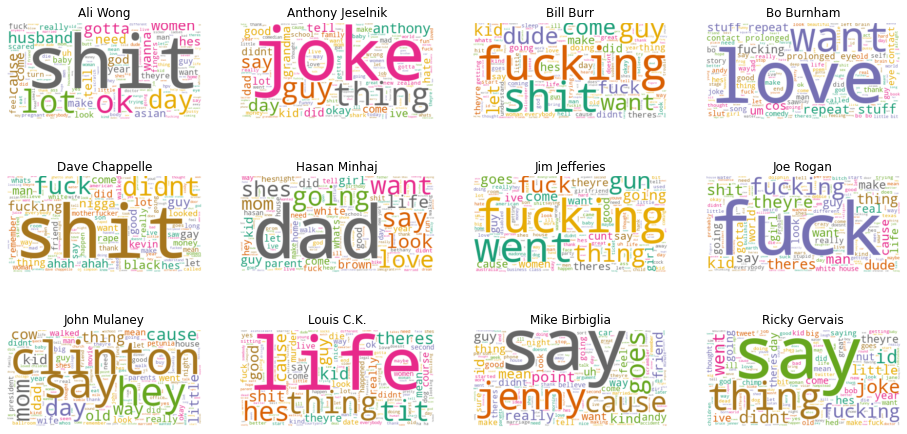

In [24]:
# Reset the output dimensions
plt.figure(figsize=[16, 8])

full_names = df['full_name']

# Create subplots for each comedian
for index, comedian in enumerate(df.index):
    # Generate word cloud
    wc.generate(df.loc[comedian, 'transcript'])
    
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

#### Findings:

+ Hasan talks about dad a lot and Joe talks about kids. I guess those might be of my interests.
+ Ali talks about women and husband. 
+ Anthony and Ricky may have similar topics

_____
## Section 3: Sentiment Analysis

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few steps, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

To install TextBlob, type the following command to your terminal:

> `conda install -c conda-forge textblob`

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

In [25]:
# We'll start by reading in the corpus, which preserves word order

corpus = pd.read_pickle('corpus.pkl')


corpus

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...,John Mulaney
louis,intro fade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with y...,Louis C.K.


#### Create quick lambda functions to find the polarity and subjectivity of each routine

In [26]:
from textblob import TextBlob

In [27]:


pol = lambda x: TextBlob(x).sentiment.polarity

sub = lambda x: TextBlob(x).sentiment.subjectivity

corpus['polarity'] = corpus['transcript'].apply(pol)

corpus['subjectivity'] =  corpus['transcript'].apply(sub)

corpus

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...,Ali Wong,0.066765,0.479597
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...,Anthony Jeselnik,0.046272,0.565844
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...,Bill Burr,0.008257,0.543996
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...,Bo Burnham,0.073695,0.553921
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...,Dave Chappelle,-0.004190,0.516956
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...,Hasan Minhaj,0.079520,0.464033
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,Jim Jefferies,0.038131,0.538653
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...,Joe Rogan,0.004948,0.557089
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...,John Mulaney,0.074638,0.491434
louis,intro fade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with y...,Louis C.K.,0.052507,0.523345


#### Visualize `polarity` (x-axis) versus `subjectivity` (y-axis) in a scatter plot. Then use the `full_name` column to color-code each data point.

Text(0, 0.5, '<-- Facts -------- Opinions -->')

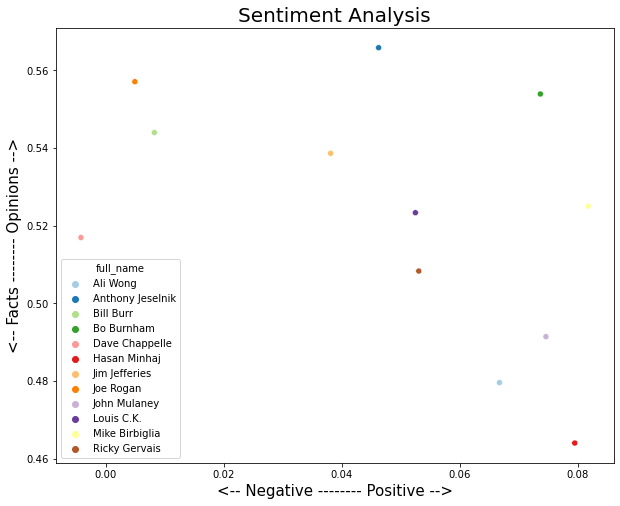

In [28]:
import seaborn as sns
plt.figure(figsize=(10, 8))

# Your plot here

sns.scatterplot(data=corpus,
               x='polarity',
               y='subjectivity',
               hue='full_name',
               palette='Paired')


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)


# Great Job!